## Windowed RQA
---

In other sections of this tutorial, like [Categorical RQA](rqaCategorical.ipynb) and [Continuous RQA](rqaContinuous.ipynb), you can learn how to run RQA on categorical and continuous time series data. In this section, we'll focus on performing a windowed version of RQA. This allows you to assess changes in recurrence over the course of a time series. By breaking the time series down into smaller overlapping segments (or 'windows') you can capture changes in the system's behaviour that a full time-series analysis might miss.

#### Selecting the Window Size and Overlap

To perform windowed RQA, we need to select the following:
- Window size: This specifies the number of samples you wish to include in each window. 
- Overlap: This is the degree of overlap between windows, often expressed as a percentage (e.g., 50% overlap). 

Window size selection for RQA should consider the specific dynamics being studied, the length of the time series, and the sample rate. For example, if you have 5 minutes of gaze data sampled at 50 Hz (i.e., 50 samples per second), and you want to assess RQA metrics for 30-second intervals, you would select a window size of 1500 samples. 

#### Let's Practice Windowed RQA

Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run RQA, and create visualizations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analysis. 

In [2]:
import os
import pandas as pd
from utils import filter_data, interpolate_missing_data
from utils.rqa_utils import perform_rqa, perform_crqa
from utils.plot_utils import plot_ts_and_rqa, plot_ts_and_crqa

c:\Github Repos\Linear-NonLinear-TSAnalysis\.venv\Lib\site-packages\pytools\persistent_dict.py:63: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


Now that all the utilities are loaded, it's time to apply RQA to some real data — in this case, [acceleration data](data/rqaContinuous/walkerAfriend.txt) from a person walking. This data was also used previously in the [Continuous RQA](rqaContinuous.ipynb) section. As such, you can compare those results to understand how a windowed analysis differs from non-windowed RQA.

For our windowed RQA, we need to select an appropriate window size. The acceleration data was sampled at 50 Hz (i.e., 50 times per second), and the time series is 10 minutes long, resulting in a total of 30,000 samples. Let's set a window size of 1 minute, which corresponds to 3000 samples. We'll also set the overlap between consecutive windows to 50%, meaning that each window overlaps the next by 30s. 

Click the "play" button below to perform the analysis and generate the visualisations.

Loading file: walkerAfriend.txt
REC: 1.853 | DET: 25.016 | MAXLINE: 39.00


c:\Github Repos\Linear-NonLinear-TSAnalysis\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


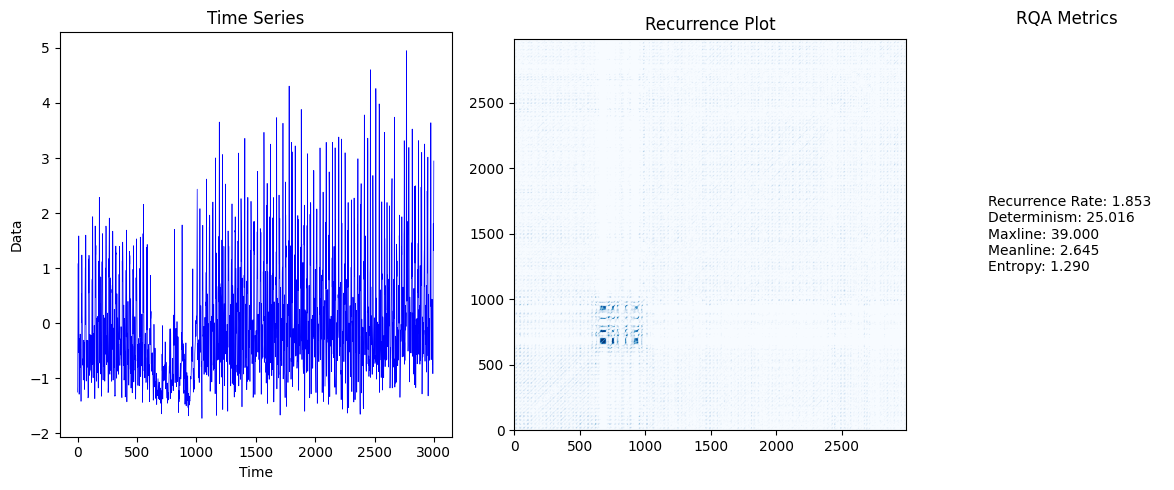

REC: 1.899 | DET: 19.188 | MAXLINE: 22.00


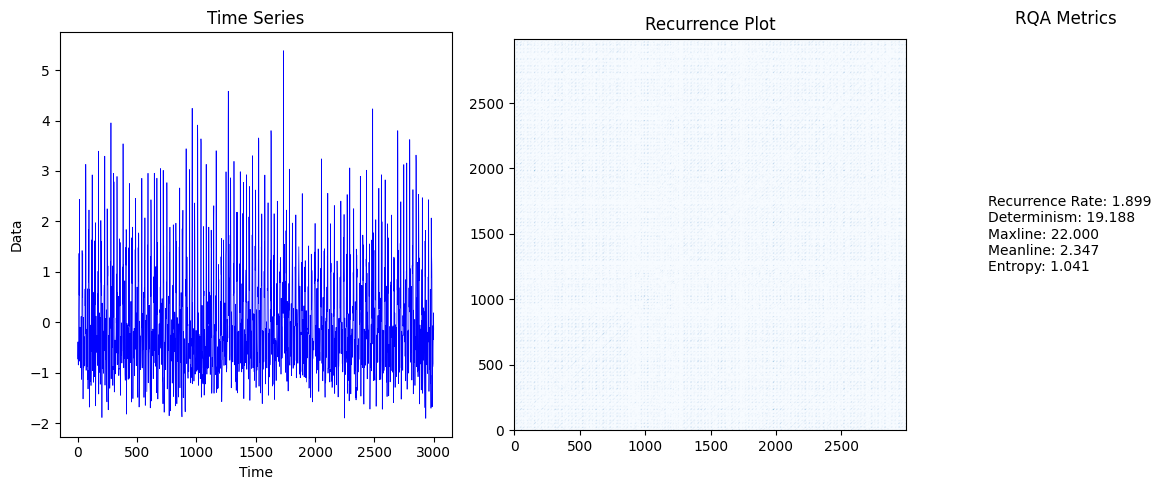

REC: 1.590 | DET: 16.447 | MAXLINE: 15.00


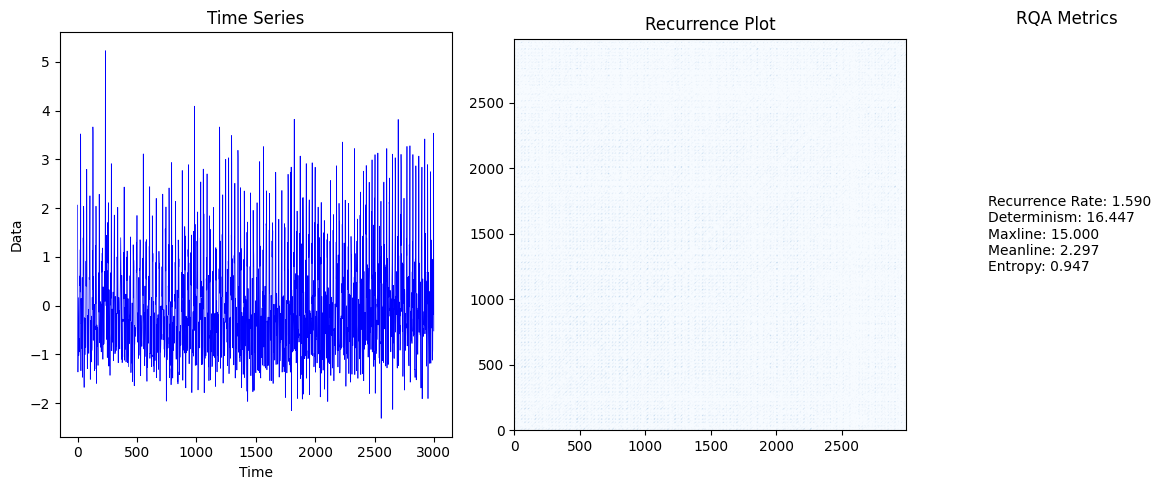

REC: 1.510 | DET: 14.795 | MAXLINE: 12.00


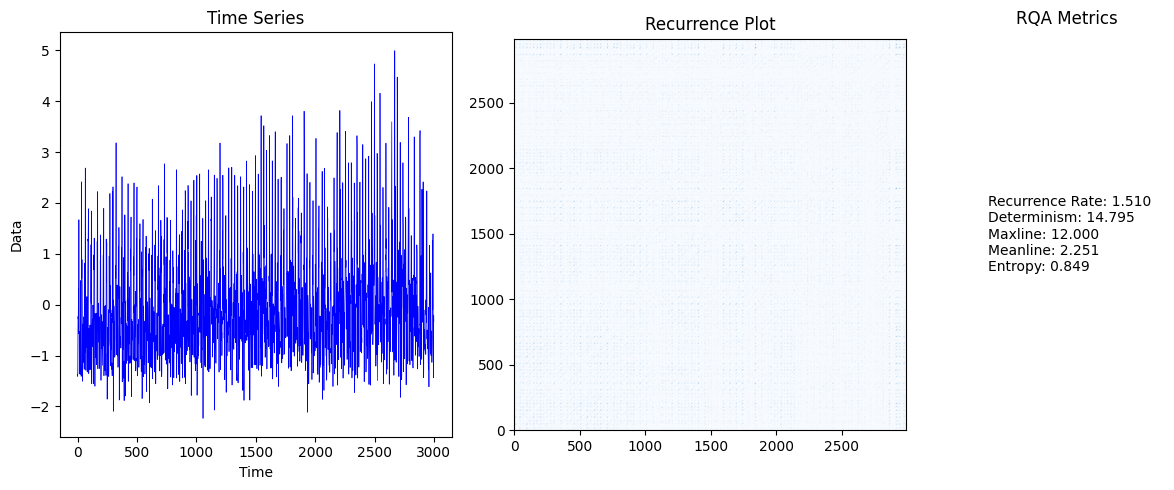

REC: 1.500 | DET: 13.662 | MAXLINE: 14.00


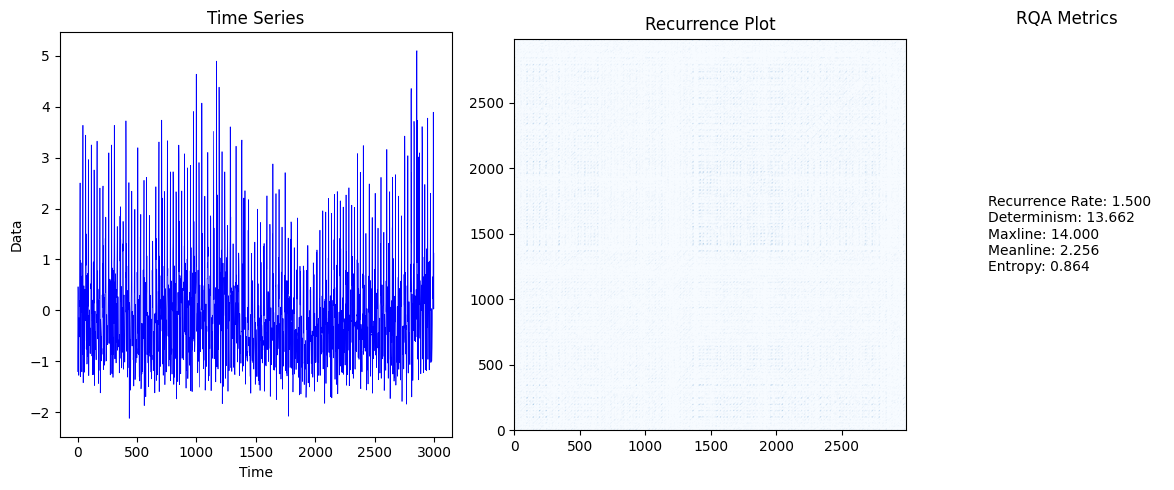

Windowed RQA analysis and plotting completed successfully!


In [6]:
# First set the directory path for the data
data_directory = "data/rqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "walkerAfriend.txt"
file_path = os.path.join(data_directory, file_name)

# RQA parameters
rqa_params = {
    'norm': 2,
    'eDim': 3,
    'tLag': 4,
    'rescaleNorm': 1,
    'radius': 0.2,
    'tw': 2,
    'minl': 2,
    'doPlots': False,
    'plotMode': 'recurrence',
    'phaseSpace': False,
    'doStatsFile': False
}

# Windowed analysis parameters
sample_rate = 50  # Hz
window_size_seconds = 60  # seconds
window_size_samples = window_size_seconds * sample_rate
overlap = 0.5  # 50% overlap
step_size = int(window_size_samples * (1 - overlap))

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None)

    # Assume the data is a single unnamed column
    continuous_data = data.iloc[:, 0].to_frame()

    # Interpolate any missing data that might be present in the file
    continuous_data = interpolate_missing_data(continuous_data)

    # Apply a filter to the data
    continuous_data = filter_data(continuous_data)
    
    # Perform windowed RQA
    num_samples = len(continuous_data)
    for start in range(0, num_samples - window_size_samples + 1, step_size):
        end = start + window_size_samples
        window_data = continuous_data[start:end]

        # Perform RQA using perform_rqa function from rqa_utils
        rqa_results, rp_results = perform_rqa(window_data, rqa_params)

        # Print RQA results
        # Create RQA metrics dictionary
        for column, result in rqa_results.items():
            rqa_metrics = {
             'Recurrence Rate': rqa_results.get('perc_recur'),
             'Determinism': rqa_results.get('perc_determ'),
             'Maxline': rqa_results.get('maxl_found'),
             'Meanline': rqa_results.get('llmnsd')[0], 
             'Entropy': rqa_results.get('entropy')[0],  
            }

        # Plot time series and recurrence plot side-by-side
        plot_ts_and_rqa(window_data[0].values, rp_results, rqa_metrics, save_image, f'images/rqa/{file_name}_window_{start}_to_{end}_combined_plot.png')
    
    print('Windowed RQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

#### Interpreting the Results

If your code ran successfully, you should see a series of plots in which the recurrence rate (%REC) slightly decreases over time.

#### Windowed CRQA

Our walker was walking with a [friend](data/rqaContinuous/walkerBfriend.txt). Let's run a windowed CRQA instead, allowing us to see how coordination between the walkers changes over time.

Click "play" on the code chunk below to run windowed CRQA comparing the original walker and their friend.

Loading file: walkersABfriend.txt
REC: 1.490 | DET: 15.266 | MAXLINE: 12.00


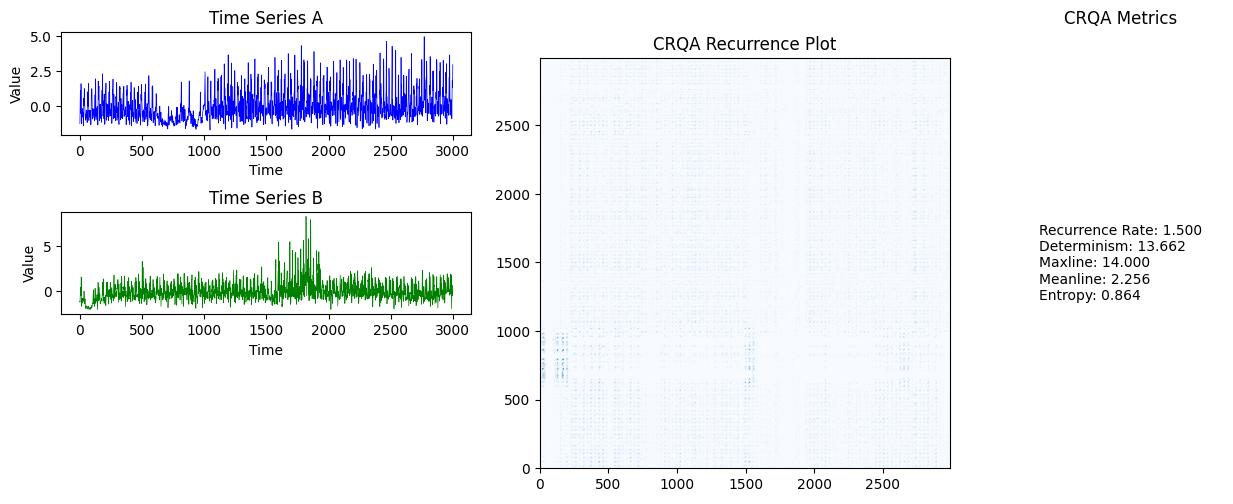

REC: 1.305 | DET: 11.416 | MAXLINE: 10.00


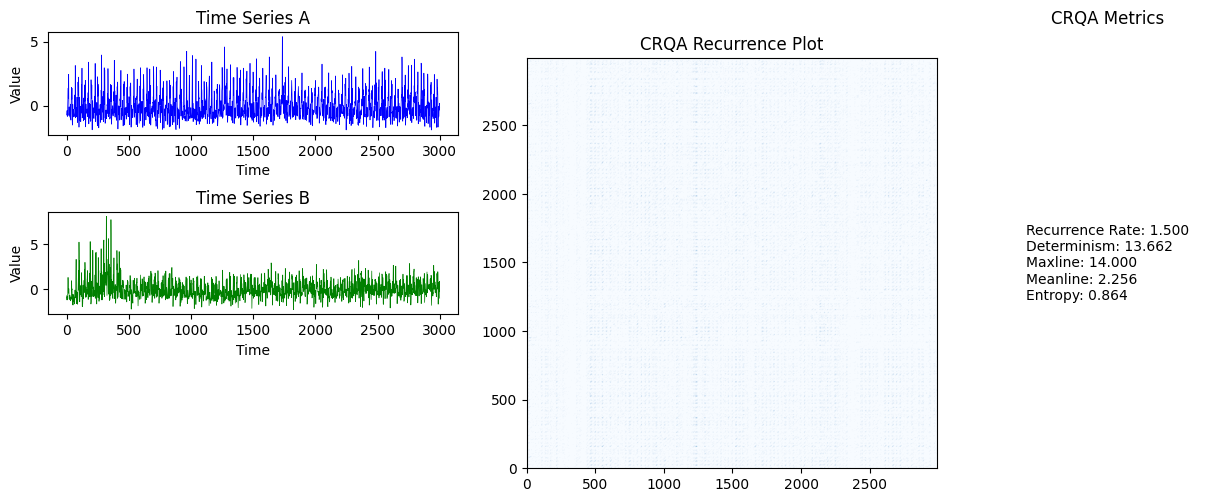

REC: 1.042 | DET: 8.923 | MAXLINE: 11.00


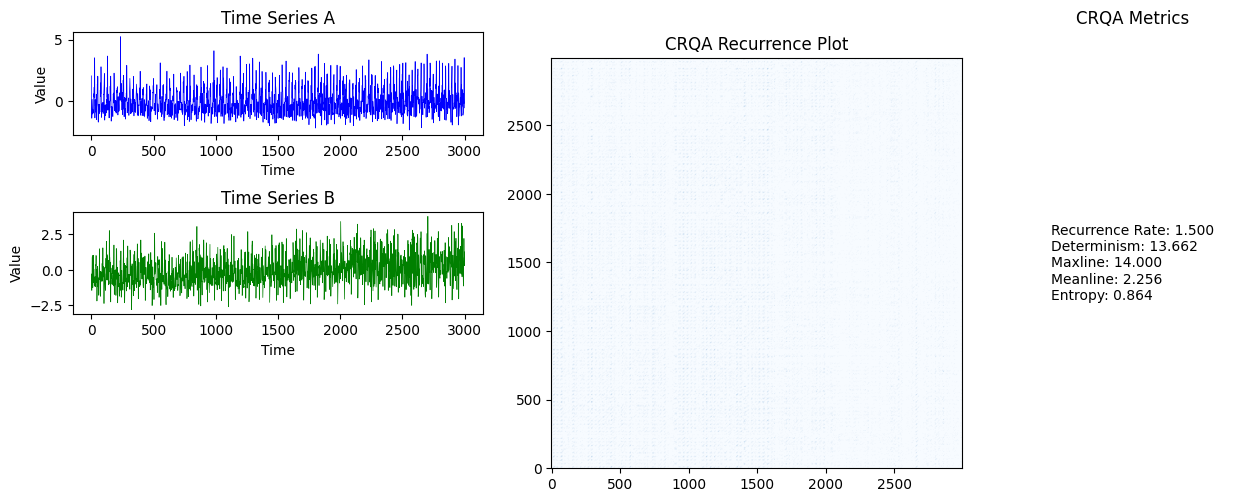

REC: 1.067 | DET: 9.259 | MAXLINE: 11.00


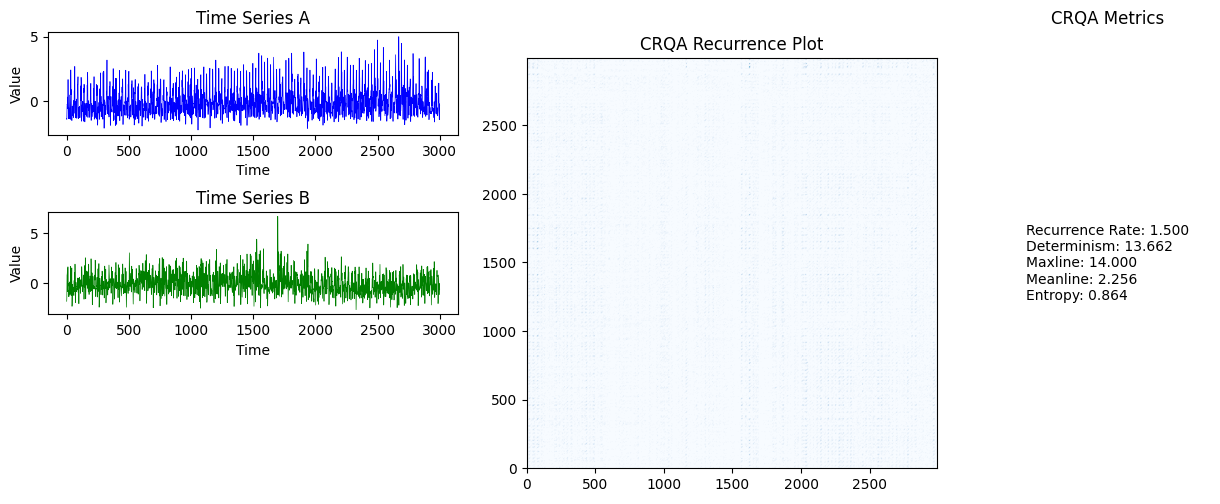

REC: 1.038 | DET: 8.731 | MAXLINE: 8.00


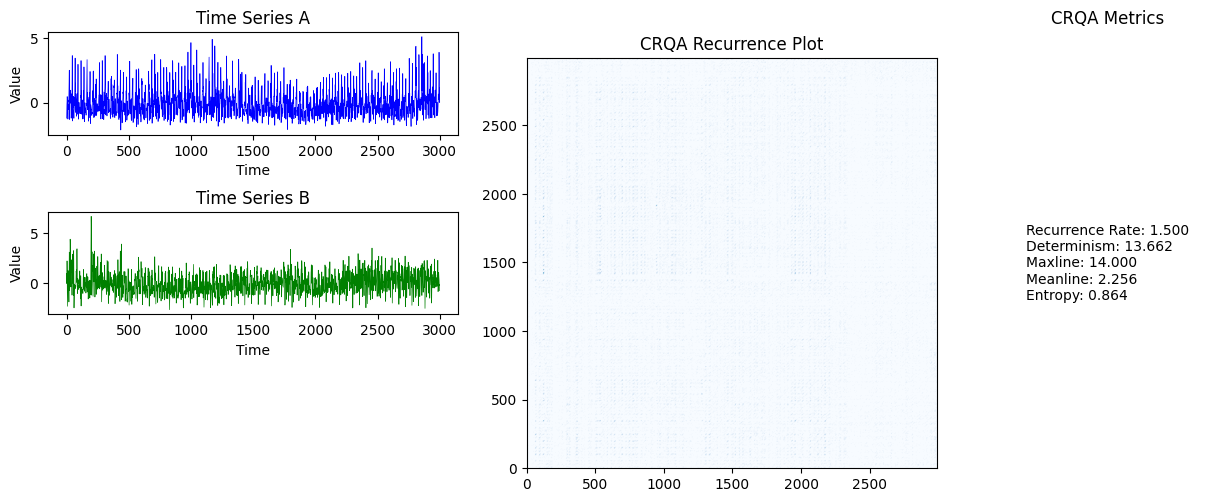

Windowed CRQA analysis and plotting completed successfully!


In [7]:
# First set the directory path for the data
data_directory = "data/crqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "walkersABfriend.txt"
file_path = os.path.join(data_directory, file_name)

# RQA parameters
crqa_params = {
    'norm': 2,
    'eDim': 3,
    'tLag': 4,
    'rescaleNorm': 1,
    'radius': 0.2,
    'tw': 2,
    'minl': 2,
    'doPlots': False,
    'plotMode': 'recurrence',
    'phaseSpace': False,
    'doStatsFile': False
}

# Windowed analysis parameters
sample_rate = 50  # Hz
window_size_seconds = 60  # seconds
window_size_samples = window_size_seconds * sample_rate
overlap = 0.5  # 50% overlap
step_size = int(window_size_samples * (1 - overlap))

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None, sep='\t')

    # Interpolate any missing data that might be present in the file
    data = interpolate_missing_data(data)

    # Apply a filter to the data
    data = filter_data(data)
    
    # Normalise the data by using a z-score
    data = (data - data.mean()) / data.std()

    # Convert data to numeric to avoid dtype issues
    data = data.apply(pd.to_numeric, errors='coerce')

    # Perform windowed CRQA
    num_samples = len(data)

    for start in range(0, num_samples - window_size_samples + 1, step_size):
        end = start + window_size_samples
        window_data = data[start:end]

        # Perform CRQA using perform_crqa function from rqa_utils
        crqa_results, rp_results = perform_crqa(window_data, crqa_params)

        # Create CRQA metrics dictionary
        for column, result in crqa_results.items():
            crqa_metrics = {
             'Recurrence Rate': rqa_results.get('perc_recur'),
             'Determinism': rqa_results.get('perc_determ'),
             'Maxline': rqa_results.get('maxl_found'),
             'Meanline': rqa_results.get('llmnsd')[0], 
             'Entropy': rqa_results.get('entropy')[0],  
            }

        # Plot time series and recurrence plot side-by-side
        plot_ts_and_crqa(window_data.iloc[:, 0].values, window_data.iloc[:, 1].values, rp_results, crqa_metrics, save_image, f'images/rqa/{file_name}_window_{start}_to_{end}_combined_plot.png')

    print('Windowed CRQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')


#### Interpreting the Results

If your code ran successfully, you should see a series of plots in which the recurrence rate (%REC) slightly decreases over time.

#### Going Further

To expand your understanding of windowed RQA, you can try the following:

1. Analyse other time series: Repeat the analyses above with other types of continuous data such as [dyadic pendulum swinging](data/rqaContinuous/pendulums.txt).
2. Experiment with other parameters: Try adjusting the radii, time delay, or embedding dimension to see how these parameters impact the recurrence plots and CRQA metrics.
3. Learn how to select an appropriate delay and embedding dimension: Head to [AMI](ami.ipynb) and [FNN](fnn.ipynb) to learn more about setting the hyperparameters required for continuous RQA.